In [4]:
from numpy import *
from numpy.linalg import solve
import matplotlib.pyplot as pt
from sklearn.preprocessing import MinMaxScaler
import pandas as pd


In [5]:
def data(T, m, datas):
    Dataset = zeros((T-M,M+1))
    j = 0
    for i in range(T-M):
        Dataset[i,:M] = datas[j : j + M]
        Dataset[i, M] = datas[j + M]
        j = j + 1

    A = Dataset[:,:M]
    y = Dataset[:, M]
    return A,y

df = pd.read_csv("shampoo.csv")
df.Month = pd.to_datetime(df.Month)
df.set_index("Month", inplace=True)
df.head()

,Sales
Month,
2000-01-01,266.0
2000-02-01,145.9
2000-03-01,183.1
2000-04-01,119.3
2000-05-01,180.3


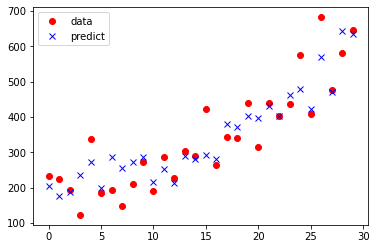

In [6]:
x = array(df["Sales"])
T = len(x)
M = 6

A, b = data(T, M, x)
theta = solve(A.T@A, A.T@b)
fpred = lambda z: z@theta
ypred = fpred(A)
n = T-M
pt.plot(arange(n),b[-n:],'or',label="data")
pt.plot(arange(n),ypred[-n:],'xb', label="predict")
#pp.plot(arange(n),y[-n:],'or',arange(n),ypred[-n:],'ob')
pt.legend();